In [3]:
from data import get_financial_statements
import pandas as pd

cik="0000320193"
df_is, df_bs, df_all = get_financial_statements(
    cik=cik,
    is_years=[2016, 2019, 2022, 2025],
    bs_years=[2017, 2019, 2021, 2023, 2025]
)


df_all

IncomeStatement                \
account    CostOfGoodsAndServicesSold   GrossProfit   
end                                                   
2014-09-27               1.122580e+11  7.053700e+10   
2015-09-26               1.400890e+11  9.362600e+10   
2016-09-24               1.313760e+11  8.426300e+10   
2017-09-30               1.410480e+11  8.818600e+10   
2018-09-29               1.637560e+11  1.018390e+11   
2019-09-28               1.617820e+11  9.839200e+10   
2020-09-26               1.695590e+11  1.049560e+11   
2021-09-25               2.129810e+11  1.528360e+11   
2022-09-24               2.235460e+11  1.707820e+11   
2023-09-30               2.141370e+11  1.691480e+11   
2024-09-28               2.103520e+11  1.806830e+11   
2025-09-27               2.209600e+11  1.952010e+11   

                                                                                                        \
account    IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest   
end                                                                                                      
2014-09-27                                       5.348300e+10                                            
2015-09-26                                       7.251500e+10                                            
2016-09-24                                       6.137200e+10                                            
2017-09-30                                       6.408900e+10                                            
2018-09-29                                       7.290300e+10                                            
2019-09-28                                       6.573700e+10                                            
2020-09-26                                       6.709100e+10                                            
2021-09-25                                       1.092070e+11                                            
2022-09-24                                       1.191030e+11                                            
2023-09-30                                       1.137360e+11                                            
2024-09-28                                       1.234850e+11                                            
2025-09-27                                       1.327290e+11                                            

                                                                  \
account    IncomeTaxExpenseBenefit InterestExpense NetIncomeLoss   
end                                                                
2014-09-27            1.397300e+10    3.840000e+08  3.951000e+10   
2015-09-26            1.912100e+10    7.330000e+08  5.339400e+10   
2016-09-24            1.568500e+10    1.456000e+09  4.568700e+10   
2017-09-30            1.573800e+10    2.323000e+09  4.835100e+10   
2018-09-29            1.337200e+10    3.240000e+09  5.953100e+10   
2019-09-28            1.048100e+10    3.576000e+09  5.525600e+10   
2020-09-26            9.680000e+09    2.873000e+09  5.741100e+10   
2021-09-25            1.452700e+10    2.645000e+09  9.468000e+10   
2022-09-24            1.930000e+10    2.931000e+09  9.980300e+10   
2023-09-30            1.674100e+10             NaN  9.699500e+10   
2024-09-28            2.974900e+10             NaN  9.373600e+10   
2025-09-27            2.071900e+10             NaN  1.120100e+11   

                                                                            \
account    NonoperatingIncomeExpense OperatingExpenses OperatingIncomeLoss   
end                                                                          
2014-09-27              9.800000e+08      1.803400e+10        5.250300e+10   
2015-09-26              1.285000e+09      2.239600e+10        7.123000e+10   
2016-09-24              1.348000e+09      2.423900e+10        6.002400e+10   
2017-09-30              2.745000e+09      2.684200e+10        6.134400e+10   
2018-09-29              2.005000e+09  

In [4]:
# Correciones para el analisis
df_all["Year"] = df_all.index
df_all["Year"]=df_all["Year"].dt.year
#df_all = df_all.dropna(subset=["Assets"])
#df_all = df_all.drop(index=[0, 1])

df_all = df_all.dropna(subset=[("BalanceSheet", "Assets")]
)
df_all[("IncomeStatement", "Revenue")] = (
    df_all[("IncomeStatement", "RevenueFromContractWithCustomerExcludingAssessedTax")].fillna(0)
    + df_all[("IncomeStatement", "SalesRevenueNet")].fillna(0))
df_all[("BalanceSheet", "LongTermDebt")] = (
    df_all[("BalanceSheet", "LongTermDebtCurrent")].fillna(0)
    + df_all[("BalanceSheet", "LongTermDebtNoncurrent")].fillna(0))
df_all = df_all.drop(
    columns=[
        ("IncomeStatement", "RevenueFromContractWithCustomerExcludingAssessedTax"),
        ("IncomeStatement", "SalesRevenueNet")])

df_all

C:\Users\Anival\AppData\Local\Temp\ipykernel_23100\770814872.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[("IncomeStatement", "Revenue")] = (
C:\Users\Anival\AppData\Local\Temp\ipykernel_23100\770814872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[("BalanceSheet", "LongTermDebt")] = (


IncomeStatement                \
account    CostOfGoodsAndServicesSold   GrossProfit   
end                                                   
2016-09-24               1.313760e+11  8.426300e+10   
2017-09-30               1.410480e+11  8.818600e+10   
2018-09-29               1.637560e+11  1.018390e+11   
2019-09-28               1.617820e+11  9.839200e+10   
2020-09-26               1.695590e+11  1.049560e+11   
2021-09-25               2.129810e+11  1.528360e+11   
2022-09-24               2.235460e+11  1.707820e+11   
2023-09-30               2.141370e+11  1.691480e+11   
2024-09-28               2.103520e+11  1.806830e+11   
2025-09-27               2.209600e+11  1.952010e+11   

                                                                                                        \
account    IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest   
end                                                                                                      
2016-09-24                                       6.137200e+10                                            
2017-09-30                                       6.408900e+10                                            
2018-09-29                                       7.290300e+10                                            
2019-09-28                                       6.573700e+10                                            
2020-09-26                                       6.709100e+10                                            
2021-09-25                                       1.092070e+11                                            
2022-09-24                                       1.191030e+11                                            
2023-09-30                                       1.137360e+11                                            
2024-09-28                                       1.234850e+11                                            
2025-09-27                                       1.327290e+11                                            

                                                                  \
account    IncomeTaxExpenseBenefit InterestExpense NetIncomeLoss   
end                                                                
2016-09-24            1.568500e+10    1.456000e+09  4.568700e+10   
2017-09-30            1.573800e+10    2.323000e+09  4.835100e+10   
2018-09-29            1.337200e+10    3.240000e+09  5.953100e+10   
2019-09-28            1.048100e+10    3.576000e+09  5.525600e+10   
2020-09-26            9.680000e+09    2.873000e+09  5.741100e+10   
2021-09-25            1.452700e+10    2.645000e+09  9.468000e+10   
2022-09-24            1.930000e+10    2.931000e+09  9.980300e+10   
2023-09-30            1.674100e+10             NaN  9.699500e+10   
2024-09-28            2.974900e+10             NaN  9.373600e+10   
2025-09-27            2.071900e+10             NaN  1.120100e+11   

                                                                            \
account    NonoperatingIncomeExpense OperatingExpenses OperatingIncomeLoss   
end                                                                          
2016-09-24              1.348000e+09      2.423900e+10        6.002400e+10   
2017-09-30              2.745000e+09      2.684200e+10        6.134400e+10   
2018-09-29              2.005000e+09      3.094100e+10        7.089800e+10   
2019-09-28              1.807000e+09      3.446200e+10        6.393000e+10   
2020-09-26              8.030000e+08      3.866800e+10        6.628800e+10   
2021-09-25              2.580000e+08      4.388700e+10        1.089490e+11   
2022-09-24             -3.340000e+08      5.134500e+10        1.194370e+11   
2023-09-30             -5.650000e+08      5.484700e+10        1.143010e+11   
2024-09-28              2.690000e+08      5.746700e+10        1.232160e+11   
2025-09-27             -3.210000e+08      6.215100e+10        1.330500e+11   

                           

In [5]:
#CÁLCULO DE RATIOS FINANCIEROS
#   Nivel 0: IncomeStatement | BalanceSheet | Ratios
# ============================================================

is_df = df_all["IncomeStatement"]
bs_df = df_all["BalanceSheet"]

# ------------------------------------------------------------
# 1. MÁRGENES (INCOME STATEMENT)
# ------------------------------------------------------------

# Margen bruto = Gross Profit / Revenue
df_all[("Ratios", "GrossMargin")] = (
    is_df["GrossProfit"] / is_df["Revenue"]
)

# Margen operativo = Operating Income / Revenue
df_all[("Ratios", "OperatingMargin")] = (
    is_df["OperatingIncomeLoss"] / is_df["Revenue"]
)

# Margen neto = Net Income / Revenue
df_all[("Ratios", "NetMargin")] = (
    is_df["NetIncomeLoss"] / is_df["Revenue"]
)

# ------------------------------------------------------------
# 2. CRECIMIENTOS
# ------------------------------------------------------------

# Crecimiento de ingresos (YoY)
df_all[("Ratios", "RevenueGrowth")] = (
    is_df["Revenue"].pct_change()
)

# Crecimiento del costo de ventas (YoY)
df_all[("Ratios", "CostGrowth")] = (
    is_df["CostOfGoodsAndServicesSold"].pct_change()
)

# ------------------------------------------------------------
# 3. RENTABILIDAD
# ------------------------------------------------------------

# ROA = Net Income / Total Assets
# (versión simple, sin promedio de activos)
df_all[("Ratios", "ROA")] = (
    is_df["NetIncomeLoss"] / bs_df["Assets"]
)

# ROE = Net Income / Equity
df_all[("Ratios", "ROE")] = (
    is_df["NetIncomeLoss"] / bs_df["StockholdersEquity"]
)

# ------------------------------------------------------------
# 4. ESTRUCTURA FINANCIERA Y LIQUIDEZ
# ------------------------------------------------------------

# Deuda de largo plazo / Activos
df_all[("Ratios", "DebtToAssets")] = (
    bs_df["LongTermDebt"] / bs_df["Assets"]
)

# Ratio corriente = Activos corrientes / Pasivos corrientes
df_all[("Ratios", "CurrentRatio")] = (
    bs_df["AssetsCurrent"] / bs_df["LiabilitiesCurrent"]
)

# Pasivos totales / Activos
df_all[("Ratios", "LiabilitiesRatio")] = (
    bs_df["Liabilities"] / bs_df["Assets"]
)

# ============================================================
# FIN DEL BLOQUE DE RATIOS
# ============================================================

In [6]:
df_all

IncomeStatement                \
account    CostOfGoodsAndServicesSold   GrossProfit   
end                                                   
2016-09-24               1.313760e+11  8.426300e+10   
2017-09-30               1.410480e+11  8.818600e+10   
2018-09-29               1.637560e+11  1.018390e+11   
2019-09-28               1.617820e+11  9.839200e+10   
2020-09-26               1.695590e+11  1.049560e+11   
2021-09-25               2.129810e+11  1.528360e+11   
2022-09-24               2.235460e+11  1.707820e+11   
2023-09-30               2.141370e+11  1.691480e+11   
2024-09-28               2.103520e+11  1.806830e+11   
2025-09-27               2.209600e+11  1.952010e+11   

                                                                                                        \
account    IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest   
end                                                                                                      
2016-09-24                                       6.137200e+10                                            
2017-09-30                                       6.408900e+10                                            
2018-09-29                                       7.290300e+10                                            
2019-09-28                                       6.573700e+10                                            
2020-09-26                                       6.709100e+10                                            
2021-09-25                                       1.092070e+11                                            
2022-09-24                                       1.191030e+11                                            
2023-09-30                                       1.137360e+11                                            
2024-09-28                                       1.234850e+11                                            
2025-09-27                                       1.327290e+11                                            

                                                                  \
account    IncomeTaxExpenseBenefit InterestExpense NetIncomeLoss   
end                                                                
2016-09-24            1.568500e+10    1.456000e+09  4.568700e+10   
2017-09-30            1.573800e+10    2.323000e+09  4.835100e+10   
2018-09-29            1.337200e+10    3.240000e+09  5.953100e+10   
2019-09-28            1.048100e+10    3.576000e+09  5.525600e+10   
2020-09-26            9.680000e+09    2.873000e+09  5.741100e+10   
2021-09-25            1.452700e+10    2.645000e+09  9.468000e+10   
2022-09-24            1.930000e+10    2.931000e+09  9.980300e+10   
2023-09-30            1.674100e+10             NaN  9.699500e+10   
2024-09-28            2.974900e+10             NaN  9.373600e+10   
2025-09-27            2.071900e+10             NaN  1.120100e+11   

                                                                            \
account    NonoperatingIncomeExpense OperatingExpenses OperatingIncomeLoss   
end                                                                          
2016-09-24              1.348000e+09      2.423900e+10        6.002400e+10   
2017-09-30              2.745000e+09      2.684200e+10        6.134400e+10   
2018-09-29              2.005000e+09      3.094100e+10        7.089800e+10   
2019-09-28              1.807000e+09      3.446200e+10        6.393000e+10   
2020-09-26              8.030000e+08      3.866800e+10        6.628800e+10   
2021-09-25              2.580000e+08      4.388700e+10        1.089490e+11   
2022-09-24             -3.340000e+08      5.134500e+10        1.194370e+11   
2023-09-30             -5.650000e+08      5.484700e+10        1.143010e+11   
2024-09-28              2.690000e+08      5.746700e+10        1.232160e+11   
2025-09-27             -3.210000e+08      6.215100e+10        1.330500e+11   

                           

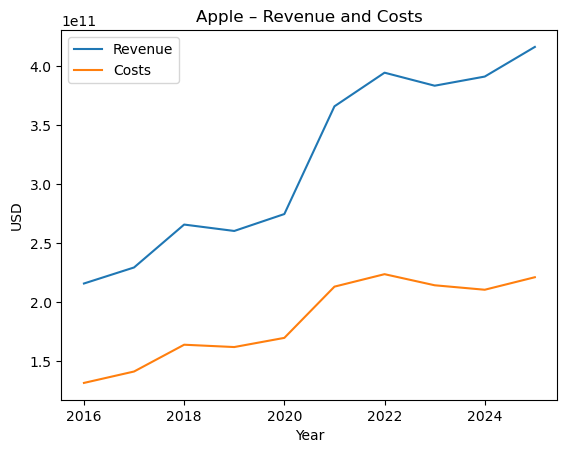

In [7]:
import matplotlib.pyplot as plt

# ============================================================
# SUB-DATAFRAMES PARA FACILITAR REFERENCIAS
# ============================================================


rt_df = df_all["Ratios"]
years = df_all["Year"]

# ============================================================
# 1. REVENUE Y COSTOS
# ============================================================

plt.figure()
plt.plot(years, is_df["Revenue"], label="Revenue")
plt.plot(years, is_df["CostOfGoodsAndServicesSold"], label="Costs")
plt.title("Apple – Revenue and Costs")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.show()


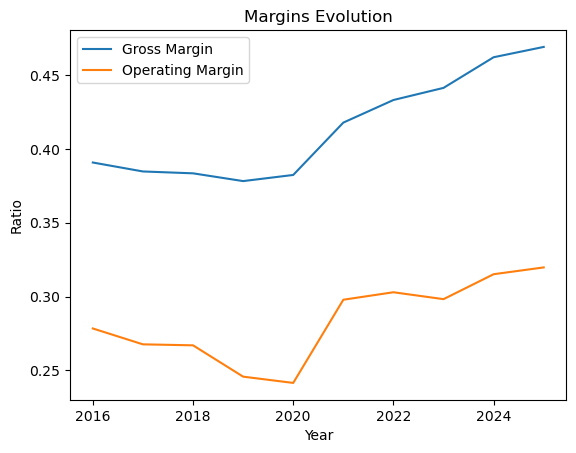

In [8]:

# ============================================================
# 2. MÁRGENES
# ============================================================

plt.figure()
plt.plot(years, rt_df["GrossMargin"], label="Gross Margin")
plt.plot(years, rt_df["OperatingMargin"], label="Operating Margin")
plt.title("Margins Evolution")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.show()


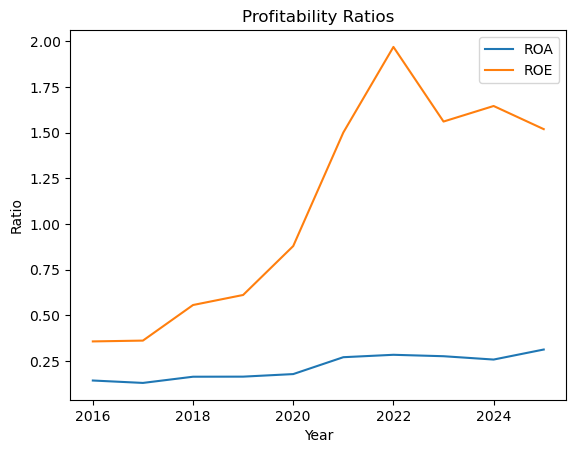

In [9]:

# ============================================================
# 3. RENTABILIDAD
# ============================================================

plt.figure()
plt.plot(years, rt_df["ROA"], label="ROA")
plt.plot(years, rt_df["ROE"], label="ROE")
plt.title("Profitability Ratios")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.show()


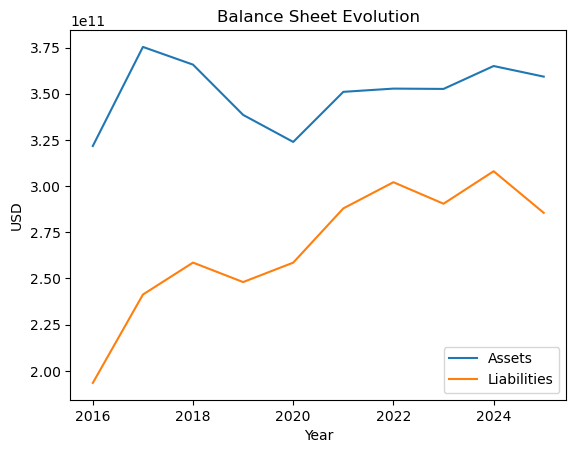

In [10]:

# ============================================================
# 4. EVOLUCIÓN DEL BALANCE
# ============================================================

plt.figure()
plt.plot(years, bs_df["Assets"], label="Assets")
plt.plot(years, bs_df["Liabilities"], label="Liabilities")
plt.title("Balance Sheet Evolution")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.show()


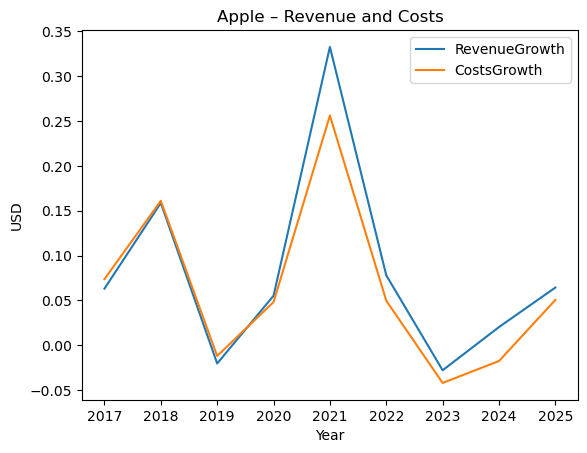

In [11]:
# ============================================================
# 5. EVOLUCIÓN DE LAS VENTAS Y COSTOS
# ============================================================

plt.figure()
plt.plot(years, rt_df["RevenueGrowth"], label="RevenueGrowth")
plt.plot(years, rt_df["CostGrowth"], label="CostsGrowth")
plt.title("Apple – Revenue and Costs")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.show()


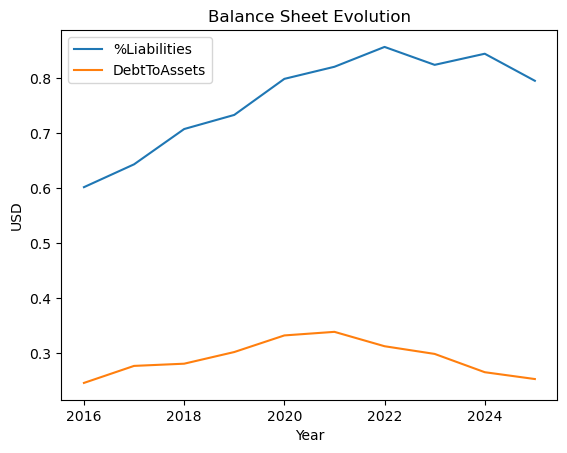

In [25]:
# ============================================================
# 4. EVOLUCIÓN DEL %PASIVOS
# ============================================================

plt.figure()
plt.plot(years, rt_df["LiabilitiesRatio"], label="%Liabilities")
plt.plot(years, rt_df["DebtToAssets"], label="DebtToAssets")
plt.title("Balance Sheet Evolution")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.show()
